In [1]:
from janus_wraper import *
import torch
from transformers import AutoModelForCausalLM
from Janus.janus.models import MultiModalityCausalLM, VLChatProcessor
from Janus.janus.utils.io import load_pil_images

# specify the path to the model
# model_path = "/projectnb/cs598/projects/cool_proj/model"
# device = 'cuda'
model_path = '/Users/nover/models/deepseek-ai/Janus-Pro-7B'
device = 'mps'

chat_processor: VLChatProcessor = VLChatProcessor.from_pretrained(model_path)

gpt: MultiModalityCausalLM = AutoModelForCausalLM.from_pretrained(
    model_path, trust_remote_code=True
)
gpt = gpt.to(torch.bfloat16).to(device).eval()





Python version is above 3.10, patching the collections module.


/Users/nover/repos/Spatial-Reasoning/.venv/lib/python3.12/site-packages/transformers/models/auto/image_processing_auto.py:599: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means

Add image tag = <image_placeholder> to the tokenizer


ImportError: FlashAttention2 has been toggled on, but it cannot be used due to the following error: the package flash_attn seems to be not installed. Please refer to the documentation of https://huggingface.co/docs/transformers/perf_infer_gpu_one#flashattention-2 to install Flash Attention 2.

In [2]:
text_prompt = 'Where is this image from?'

# # Load the image from a file
image = Image.open("img.jpg")
# tokenizer = vl_chat_processor.tokenizer

# Call the unified function for multimodal understanding (text output)
result = janus_pro_generate(
    chat_processor,
    gpt,
    device=device,
    input_text=text_prompt,
    input_images=[image],
    output_mode="text",
)
print(result)


This image appears to be from a parade or military event, possibly in a country with a significant military presence. The tanks and the presence of a person walking in front of them suggest a formal display or procession.


In [3]:
# text_prompt = 'make this image a meme'
#
# # # Load the image from a file
# image = Image.open("img.jpg")
# # tokenizer = vl_chat_processor.tokenizer
#
# # Call the unified function for multimodal understanding (text output)
# result = janus_pro_generate(
#     chat_processor,
#     gpt,
#     device=device,
#     input_text=text_prompt,
#     input_image=image,
#     output_mode="image",
#     guidance=5,
#     t2i_temperature=1.0,
#     num_images=2,
#     # width=192,
#     # height=192,
# )


In [4]:
# # Save generated images to disk.
# for idx, img in enumerate(result):
#     display(img)
#
#
# # Print the generated text response
# print("Generated Text Response:")

dict_keys(['train', 'validation'])
dict_keys(['image_bytes', 'question', 'answers', 'question_type', 'correct_answer'])


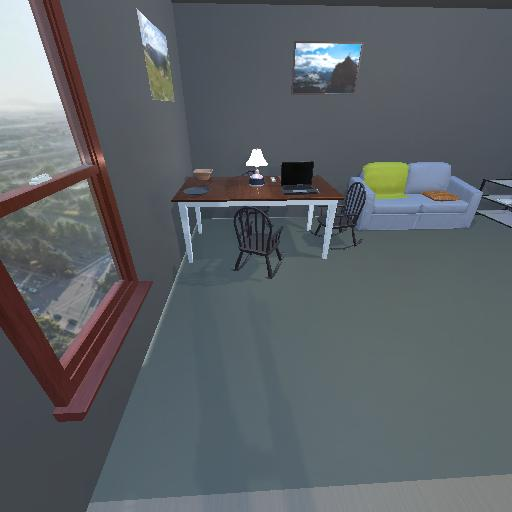

How many Chairs are visible in the scene?
['3', '0', '6', '4', '5']
3


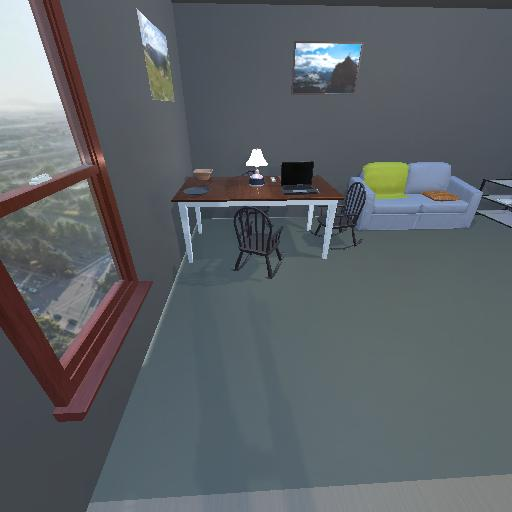

How many DiningTables are visible in the scene?
['1', '0', '6', '4', '5']
1


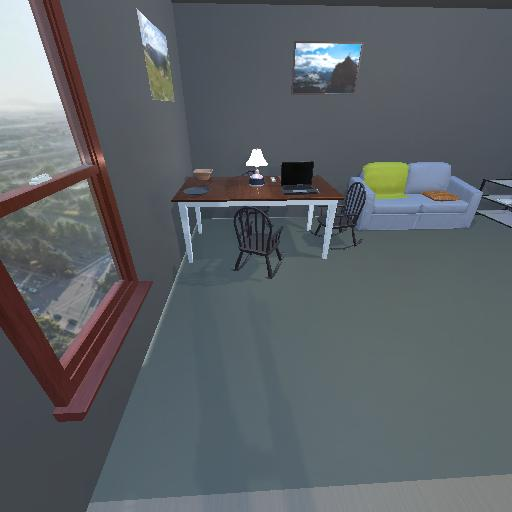

How many Sofas are visible in the scene?
['1', '0', '6', '4', '5']
1


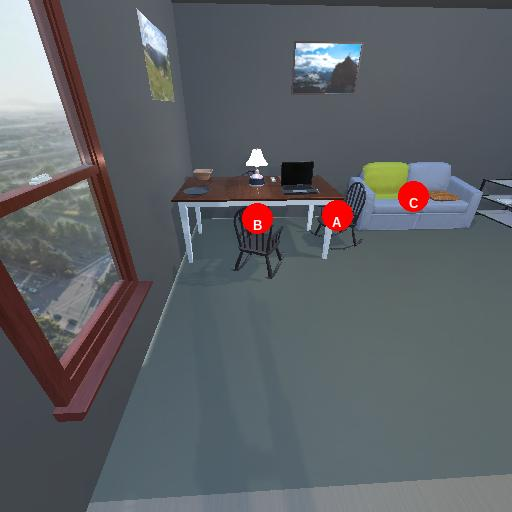

Which point is closer to the camera taking this photo, point A  or point B?
['B', 'A']
B


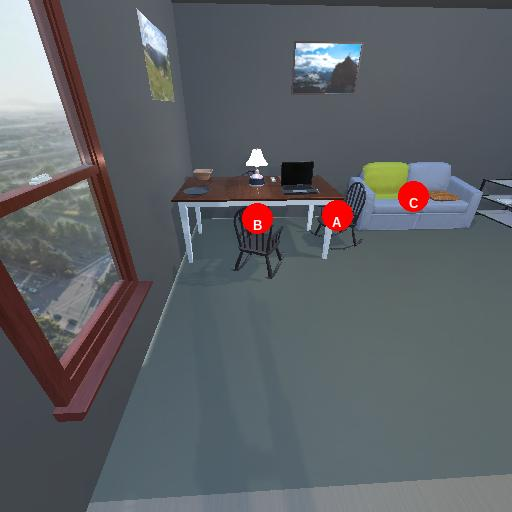

Is black colour chair (marked A) behind brown top white leg dining table (marked B)?
['yes', 'no']
yes


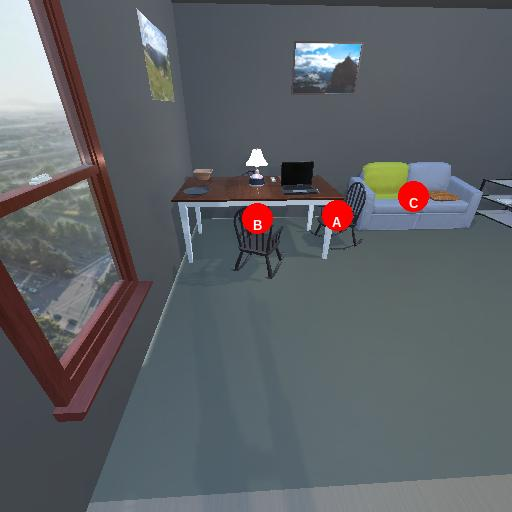

Which point is closer to the camera taking this photo, point B  or point C?
['B', 'C']
B


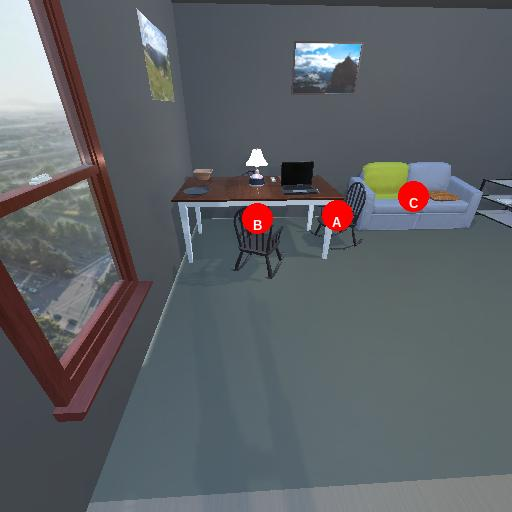

Considering the relative positions, where is black colour chair (marked A) with respect to brown top white leg dining table (marked B)?
['right', 'left']
right


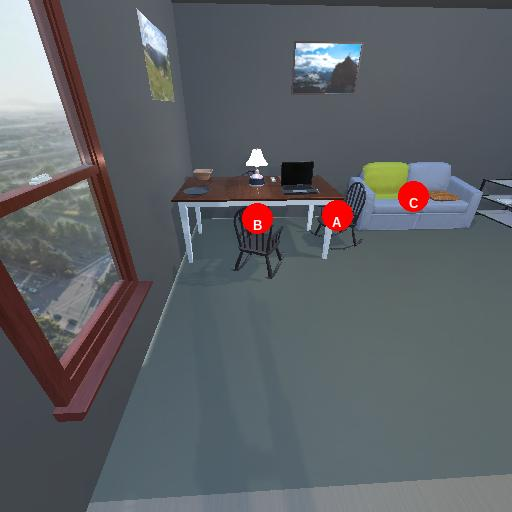

Considering the relative positions, where is brown top white leg dining table (marked B) with respect to blue two-seater sofa with green and blue cushions (marked C)?
['left', 'right']
left


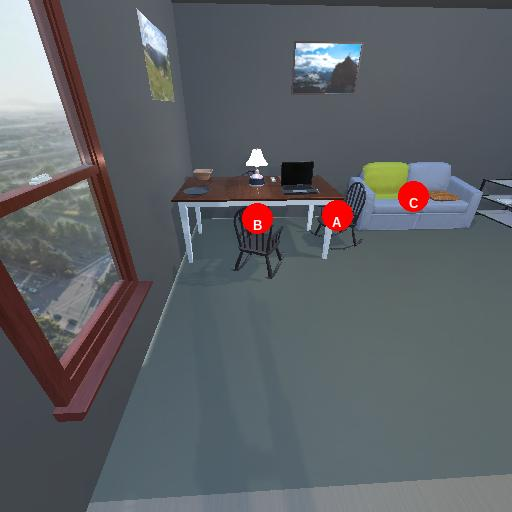

Considering the relative positions, is black colour chair (marked A) to the left or right of blue two-seater sofa with green and blue cushions (marked C)?
['left', 'right']
left


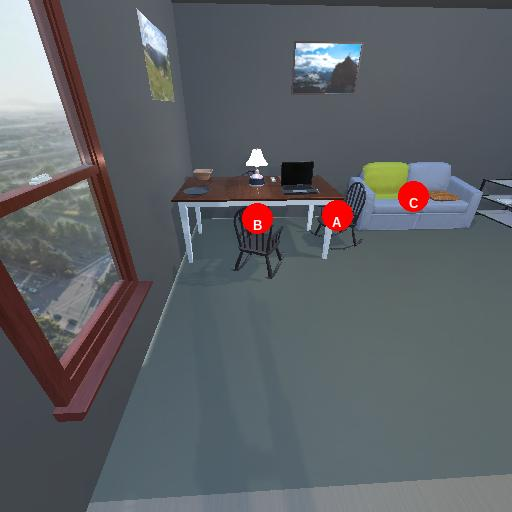

Considering the relative positions, is brown top white leg dining table (marked B) above or below black colour chair (marked A)?
['below', 'above']
below


In [5]:
import re
from datasets import load_dataset
import io

dataset = load_dataset("array/SAT", batch_size=128)

# dataset should have a training and validation key
print(dataset.keys())
example = dataset['train'][:10] # example 10th item
print(example.keys())
for i in range(len(example['image_bytes'])):
    display(example['image_bytes'][i][0])
    print(example['question'][i])
    print(example['answers'][i])
    print(example['correct_answer'][i])

#again not working

In [8]:
import pandas as pd
import io
from PIL import Image

df = pd.read_parquet('data/SAT', engine='pyarrow')#change path here

example = df.iloc[10]
images = [Image.open(io.BytesIO(im_bytes)) for im_bytes in example['image_bytes']]

import matplotlib.pyplot as plt

# Display images
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

if len(images) == 1:
    axes.imshow(images[0])
    axes.axis("off")
else:
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis("off")

plt.show()

question = example['question']
print(question)
answer_choices = example['answers']
print(answer_choices)
correct_answer = example['correct_answer']
print(correct_answer)

ArrowNotImplementedError: Nested data conversions not implemented for chunked array outputs

In [ ]:


import pandas as pd
import io
from PIL import Image

df = pd.read_parquet('/projectnb/cs598/projects/cool_proj/Spatial-Reasoning/dataset', engine='pyarrow')#change path here

example = df.iloc[10]
images = [Image.open(io.BytesIO(im_bytes)) for im_bytes in example['image_bytes']]

import matplotlib.pyplot as plt

# Display images
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

if len(images) == 1:
    axes.imshow(images[0])
    axes.axis("off")
else:
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis("off")

plt.show()

question = example['question']
print(question)
answer_choices = example['answers']
print(answer_choices)
correct_answer = example['correct_answer']
print(correct_answer)

# Function to convert bytes to BytesIO objects
def convert_to_bytesio(image_bytes):
    return np.asarray([Image.open(io.BytesIO(im_bytes)) for im_bytes in image_bytes])

    # if isinstance(image_bytes, ):
    #     # If it's a list of images, convert each image
    #     return [Image.open(io.BytesIO(im_bytes)) for im_bytes in image_bytes]
    # else:
    #     print(type(image_bytes))
    #     # If it's a single image
    #     return Image.open(io.BytesIO(image_bytes))


# Apply the conversion to the entire column
df['image_bytes'] = df['image_bytes'].apply(convert_to_bytesio)


In [11]:
from tqdm import tqdm


def extract_ans(pred_text):

    

    matches = re.findall(r"\[(.*?)\]", pred_text)
    
    return matches[0]

def predict_all(dataset, vl_chat_processor, vl_gpt, device='cuda'):
    predictions = []

    for i in tqdm(range(len(dataset['image_bytes']))):
        input_image = dataset['image_bytes'][i]
        question = dataset['question'][i]
        answer_choices = dataset['answers'][i]
        
        input_prompt = f'''
                        Instructions: You have to answer the following question using the given options.
                                      Enclose your answer in [].
                                      For example, if the answer is yes, it must be formatted like [yes].

                        Question: {question}

                        Image: {input_image}

                        Options: {answer_choices}                        

                       '''

        prediction_text = janus_pro_generate(
            vl_chat_processor=vl_chat_processor,
            vl_gpt=vl_gpt,
            input_text=input_prompt,
            answer_choices=answer_choices,
            input_image=input_image,
            device=device,
            output_mode="text",
            temperature=0.1,
            top_p=0.95,
            seed=42
        )
        prediction = extract_ans(prediction_text)
        predictions.append({
            "question": question,
            "answers": answer_choices,
            "prediction": prediction,
            "correct_answer": dataset['correct_answer'][i]
        })

        print(f"Question: {question}")
        print(f"Choices: {answer_choices}")
        print(f"Predicted Answer: {prediction}")
        print(f"Correct Answer: {dataset['correct_answer'][i]}")
        print("-" * 50)

    return predictions

predictions = predict_all(dataset['validation'], chat_processor, gpt)
#made a prediction function but might need some fixing @Surya

TypeError: janus_pro_generate() got an unexpected keyword argument 'answer_choices'

In [ ]:
correct_num = 0
total = len(predictions)

for i in predictions:
    
    if i['correct_answer'] == i['prediction']: correct_num += 1 # used 'in' cause its a list.
                                                                # If the model is just predicting one ans during testing this, we can just make it one.                        


